jupyter nbconvert HKcourse2.ipynb --to slides --post serve

# Some Facets of Information Theoretical Graph Analytics

F. Oggier (School of Physical and Mathematical Sciences, NTU, Singapore) 

CSCIT 2019, CUHK

<img src="fb.png" width=500 height=500>

###  Centralities and Entropic Centralities

### Random Graphs and Power Law

### Information Theoretic Clustering

### A Case Study: Bitcoin Forensics

## Random Graphs and Power Law

We speak of **random graphs** for probability distributions over graphs, whether a graph is described by a probability distribution, or generated by a random process (Bollobás 01).

The **Erdos-Renyi model**: 
<div style="background-color:rgba(128, 0, 0, 0.1); text-align:left; vertical-align: middle; padding:20px 0;">
Consider the space $\mathcal{G}_{n,M}$ of all graphs with $V=\{1,\ldots,n\}$ and $|E|=M$.  Then $N= {n \choose 2}$ is the number of all possible edges between vertices. A choice of $M$ edges among $N$ defines a graph $G(n,M)$, there are thus ${N \choose M}$ elements in $\mathcal{G}_{n,M}$, which is made into a probability space by drawing an element $G(n,M)$ uniformly at random.
</div>

$G(n,M)$ can be seen as a snapshot at a particular time $M$ of the random graph process which starts with $n$ vertices and no edge, and at each step adds one new edge chosen uniformly at random from the set of missing edges.

Important result (Erdős–Rényi 59): as $M=M(n)$ increases, the structure of a typical $G(n,M)$ tends to change, from disconnected to connected. 



The **Gilbert’s model**:
<div style="background-color:rgba(128, 0, 0, 0.1); text-align:left; vertical-align: middle; padding:20px 0;">
Let $\{X_{ij}: 1\leq i < j \leq n\}$ be an array of iid Bernoulli random variables, with $Pr(X_{ij}= 1) =p$ and $Pr(X_{ij}= 0) = 1−p$.  Let $G(n,p)$ be the random graph on $V=\{1,\ldots,n\}$ in which two vertices $i$ and $j$ are adjacent if $X_{ij}= 1$.
</div>

$G(n,p)$ is constructed by putting in edges with probability $p$, independently of each other.  
For $M\sim pN$, the models $G(n,M)$ and $G(n,p)$ are almost interchangeable.

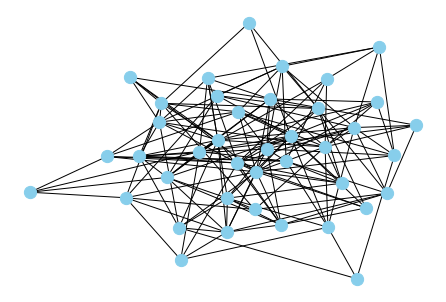

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
#The Gn,p model chooses each of the possible edges with probability p.
ER = nx.erdos_renyi_graph(40, 0.2)
posER = nx.spring_layout(ER)
nx.draw(ER,posER,node_color='skyblue',node_size = 150)
plt.show()

* Connectedness in random networks is a big deal for sensor/wireless/ad hoc networks.

The **degree distribution** $P(k)$ of a network is the fraction of nodes in the network with degree $k$: 
<div style="background-color:rgba(128, 0, 0, 0.1); text-align:left; vertical-align: middle; padding:20px 0;">
$P(k) = \tfrac{n_k}{|V|}$ if there are $n_k$ nodes of degree $k$. 
</div>

For $G(n,p)$: $P(k)={|V|-1 \choose k}p^k(1-p)^{|V|-1-k}$. It is known that for $|V|$ large and $|V|p$ constant, this tends to a Poisson distribution.

A triplet is formed of three nodes, connected by either two (open triplet) or three (closed triplet) undirected ties. 
The **global clustering coefficient** $C_{clus}$ is defined by
<div style="background-color:rgba(128, 0, 0, 0.1); text-align:left; vertical-align: middle; padding:20px 0;">
$C_{clus}=\frac{\mbox{number of closed triplets}}{\mbox{number of open and and closed triplets}}$.
</div>

For $G(n,p)$: the expected clustering coefficient tends to $p$ when $|V|$ is large.

Study of real life networks (e.g. internet, social networks) showed that these networks typically have a different behaviour in terms of both degree distribution (most nodes have a low degree but a small number, called "hubs", have a high degree) and global clustering (nodes tend to create tightly knit groups with relatively high dense connections).

The **Watts-Strogatz** model is described the following algorithm:
<div style="background-color:rgba(128, 0, 0, 0.1); text-align:left; vertical-align: middle; padding:20px 0;">
Let $K$ denote the mean degree (assumed to be an even integer), $p$ be a parameter between 0 and 1, and suppose $|V| >> K>> \ln ⁡ N>> 1$. Label vertices as $0,1,\ldots,|V|$.         
<ol>
<li>There is an edge $(i,j)$ if and only if $0 < |i-j|\mod (|V|-\frac{K}{2}) \leq \frac{K}{2}$. 
This creates a graph where every node has $K$ neighbours, $\frac{K}{2}$ on each side. Its degree distribution is thus a Dirac.</li>              
<li>For every node $i$, take every edge $(i,j\mod |V|)$ with $j>i$, $j\leq i+\frac{K}{2}$ and replace, with probability $p$,  $(i,j\mod |V|)$ with $(i,k)$ where $k$ is chosen uniformly at random from all possible nodes while avoiding self-loops and edge duplication.
</li>
</ol>
</div>
    
This gives a graph with $|V|$ vertices, $\frac{|V|K}{2}$ edges, and $C_{clus}\sim \frac{3(K-2)}{4(K-1)}(1-p)^3$. Its degree distribution is however *unrealistic* (remember step 1. creates a Dirac).  

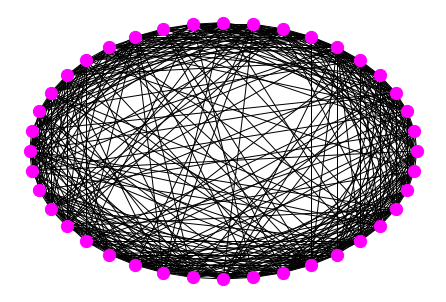

In [3]:
#parameters are no of nodes, K, and p
WS = nx.watts_strogatz_graph(40,20,0.2)
posWS = nx.circular_layout(WS)
nx.draw(WS,posWS,node_color='magenta', node_size = 150)
plt.show()

The average path length for a Watts-Strogatz graph varies from $\frac{|V|}{2K}$ when $p=0$ to approach $\frac{\ln |V|}{\ln K}$ when $p=1$. It quickly approaches its limiting value when $p>0$. 


<div style="background-color:rgba(128, 0, 0, 0.1); text-align:left; vertical-align: middle; padding:20px 0;"> 
A <b>small-world</b> network is a network in which the average distance between two nodes grows  as $\log |V|$ and the clustering coefficient is not small.
</div>    


* Kleinberg’s small-world model for P2P networks (Kleinberg 99), greedy routing in decentralized networks (e.g. Chord)

* Milgram's experiment ("six degrees of separation")

This leads to the **Barabási–Albert** model, also described by an algorithm:

<div style="background-color:rgba(128, 0, 0, 0.1); text-align:left; vertical-align: middle; padding:20px 0;"> 
<ol>    
<li>
Start with an initial connected network of $m_{0}$ nodes.         
</li>
<li>
Add new nodes one at a time, the new node is connected to $m \leq m_0$ existing nodes and the probability to connect to node $i$ is $p_i =\frac{deg(i)}{\sum deg(j)}$ where the sum is taken over existing nodes.
</li>
</ol>
</div>

It has degree distribution $P(k)\sim k^{-3}$ and clustering coefficient $C_{clus}=\frac{(\ln |V|)^2}{|V|}$.

This model includes **growth** (the number of nodes in the network increases over time) and **preferential attachment** (the more connected a node is, the more likely it is to receive new links). 


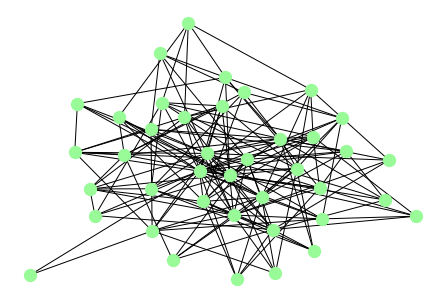

In [4]:
#A graph of n nodes is grown by attaching new nodes each with m edges that are preferentially attached 
#to existing nodes with high degree.
BA = nx.barabasi_albert_graph(40,5)
posBA = nx.spring_layout(BA)
nx.draw(BA,posBA,node_color='palegreen', node_size = 150)
plt.show()

A **power-law distribution** is a probability distribution given by
<div style="background-color:rgba(128, 0, 0, 0.1); text-align:left; vertical-align: middle; padding:20px 0;">
$p(x) = Cx^{-\alpha},~x \geq x_{min}$
</div>
where $C$ is a normalization constant:

* in the discrete case, $\sum_{x \geq x_{min}} p(x) = C \sum_{x \geq x_{min}} x^{-\alpha} = 1$.

* in the continuous case, $\int_{x_{min}}^\infty p(x)dx = C \int_{x_{min}}^\infty x^{-\alpha} dx = C \tfrac{x_{min}^{-\alpha+1}}{\alpha-1}$, assuming that $\alpha>1$ (otherwise the exponent $-\alpha+1$ is positive and this quantity is infinite), from which $C=(\alpha-1)x_{min}^{\alpha-1}$.

The $m$th moment of a random variable $X$ distributed according to $p(x)$ is given by $\langle X^m \rangle = \sum_{x \geq x_{min}}x^m  p(x)$, or $\langle X^m \rangle =\int_{x_{min}}^\infty x^m p(x) dx = C \tfrac{x_{min}^{-\alpha+1+m}}{\alpha-m-1}$ assuming that $\alpha>m+1$, which simplifies to $x_{min}^m\tfrac{\alpha-1}{\alpha-m-1}$. In particular, the mean is given for $m=1$.


A power-law (or scale-free) directed graph with $n=|V|$ is a graph whose in-degrees $k^{in}_1,\ldots,k^{in}_n$ and out-degrees $k^{out}_1,\ldots,k^{out}_n$ are realizations of the random variables $K^{in},K^{out}$ which follow the respective power laws:
\begin{eqnarray*}
p_{in}(x) &=& C_{in}x^{-\alpha_{in}},~x \geq x_{min}^{in},\\
p_{out}(x) &=& C_{out}x^{-\alpha_{out}},~x \geq x_{min}^{out}.
\end{eqnarray*}

Since every edge must leave some node and enter another one, the average in-degree and out-degree are the same: $\langle K^{in} \rangle =  \langle K^{out} \rangle$. Then by the law of large numbers, $\sum_{i \in V}k_i^{out}=\sum_{i \in V}k_i^{in} = n \langle K^{in} \rangle$ and the probability $q_{ij}$ that nodes $i$ and $j$ are connected by a directed edge from $i$ to $j$ is 
$q_{ij}=\frac{k_i^{out}k_j^{in}}{\sum_{i \in V}k_i^{in}}=\frac{k_i^{out}k_j^{in}}{n \langle K^{in} \rangle}$.

* A Barabási-Albert graph has degree distribution $P(k)\sim k^{-3}$.

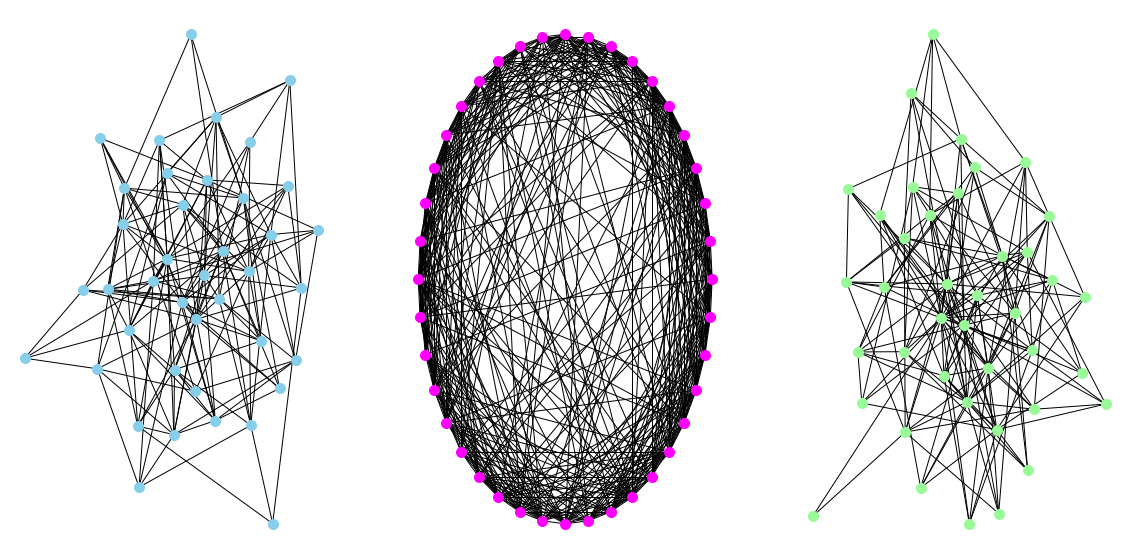

In [5]:
fig = plt.figure(figsize=(20,10))

plt.subplot(1, 3, 1)
nx.draw(ER,posER,node_color='skyblue', node_size = 100)

plt.subplot(1, 3, 2)
nx.draw(WS,posWS,node_color='magenta', node_size = 100)

plt.subplot(1, 3, 3)
nx.draw(BA,posBA,node_color='palegreen', node_size = 100)

plt.show()

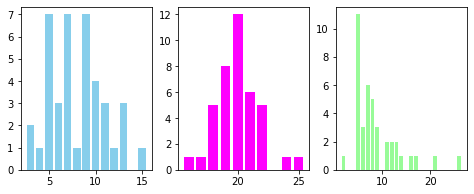

In [7]:
import collections

degree_sequenceER = sorted([d for n, d in ER.degree()], reverse=True) 
degree_sequenceWS = sorted([d for n, d in WS.degree()], reverse=True) 
degree_sequenceBA = sorted([d for n, d in BA.degree()], reverse=True) 
#counts
degreeCountER = collections.Counter(degree_sequenceER)
degER, cntER = zip(*degreeCountER.items())
degreeCountWS = collections.Counter(degree_sequenceWS)
degWS, cntWS = zip(*degreeCountWS.items())
degreeCountBA = collections.Counter(degree_sequenceBA)
degBA, cntBA = zip(*degreeCountBA.items())

fig = plt.figure(figsize=(8,3))
plt.subplot(1, 3, 1)
plt.bar(degER, cntER, width=0.80, color='skyblue')
plt.subplot(1, 3, 2)
plt.bar(degWS, cntWS, width=0.80, color='magenta')
plt.subplot(1, 3, 3)
plt.bar(degBA, cntBA, width=0.80, color='palegreen')
plt.show()

In [8]:
print(nx.transitivity(ER))
print(nx.transitivity(WS))
print(nx.transitivity(BA))

0.23006134969325154
0.5518276762402089
0.30662983425414364


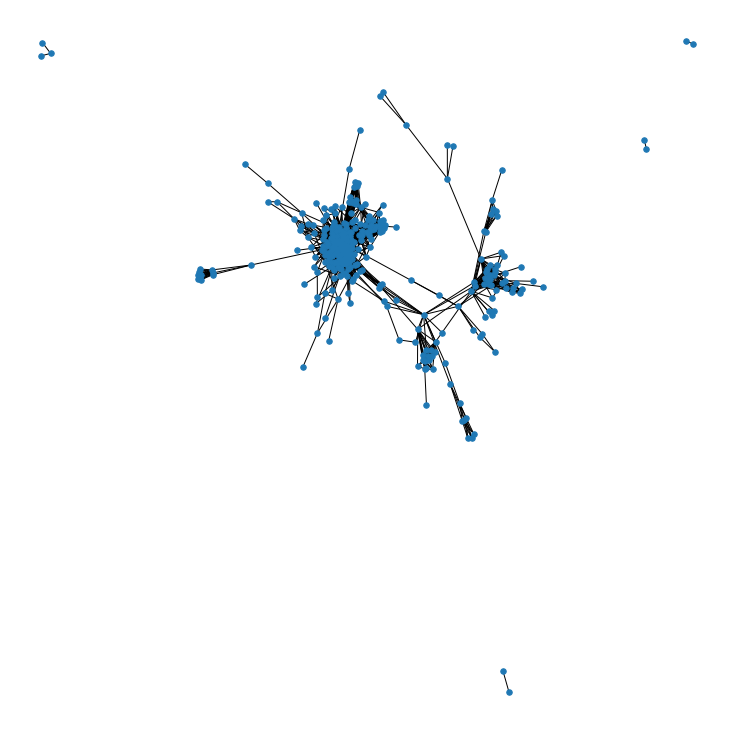

In [11]:
#https://snap.stanford.edu/data/egonets-Facebook.html

Gf = nx.read_edgelist("facebook/0.edges")
posf = nx.spring_layout(Gf)
fig = plt.figure(figsize=(10,10))
nx.draw(Gf,posf,node_size=30)
plt.show()

alpha: 1.604877719735091 xmin 2.0
None


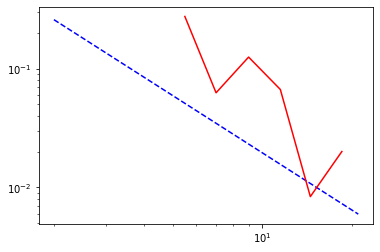

In [27]:
import powerlaw

#computes frequencies
degreeCountBA = collections.Counter(degree_sequenceBA)
freq_pl = [degreeCountBA[k]/sum(degreeCountBA) for k in degreeCountBA.keys()]
freq_pl.sort(reverse=True)

#computes power law fitting
fit = powerlaw.Fit(degree_sequenceBA,xmin = min(degree_sequenceBA), discrete=True)
alpha = fit.power_law.alpha
print('alpha:', alpha,'xmin', fit.power_law.xmin,fit.power_law.xmax)
#plots the pdf of the data
fit.power_law.plot_pdf( color= 'b',linestyle='--')
#plots the pdf of the theoretical powerlaw distribution
fit.plot_pdf( color= 'r')
plt.show()

alpha: 2.694904961623574 xmin 5.0
None


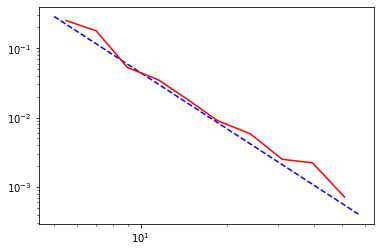

In [31]:
BA = nx.barabasi_albert_graph(200,5)
degree_sequenceBA = sorted([d for n, d in BA.degree()], reverse=True)
#computes frequencies
degreeCountBA = collections.Counter(degree_sequenceBA)
freq_pl = [degreeCountBA[k]/sum(degreeCountBA) for k in degreeCountBA.keys()]
freq_pl.sort(reverse=True)

#computes power law fitting
fit = powerlaw.Fit(degree_sequenceBA,xmin = min(degree_sequenceBA), discrete=True)
alpha = fit.power_law.alpha
print('alpha:', alpha,'xmin', fit.power_law.xmin,fit.power_law.xmax)
#plots the pdf of the data
fit.power_law.plot_pdf( color= 'b',linestyle='--')
#plots the pdf of the theoretical powerlaw distribution
fit.plot_pdf( color= 'r')
plt.show()

* internet (Faloutsos et al. 99)

* social network analysis (e.g. Bitcoin was shown to have a power law distribution, Reid et al 13, Kondor et al 14)

* The clustering coefficient decreases as the node degree increases (in small communities, everyone knows everyone).

* Scale-free graphs commonly contain **hubs**, nodes with a much higher degree than the average.

* Network's fault tolerance: if failure happens at random, the likelihood that a hub will fail is negligible. If a hub fails, chances are that the network will remain connected (percolation theory).

* The average distance between two vertices is small (small world, more later).



Average path length analysis (Fronczak et al, 2004)

A directed walk on $G$: vertices can be repeated, creating possibly directed cycles. 

A directed path: no repetition of any vertex, thus no cycle. 

In a directed walk from $i$ to $j$, skipping the cycles will give a path. 

Let $p_{ij}(l)$ be the probability that there is at least one walk of length $l$ between $i$ and $j$. 

Then $p_{ij}^*(l)=p_{ij}(l)-p_{ij}(l-1)$ is the probability that $i$ and $j$ are at distance $l$ from each other and
$p_{ij}(l) \approx  1 - \exp(s_{ij}(l))$
where 
$s_{ij}(l) = -\sum_{v_1\in V}\ldots\sum_{v_{l-1}\in V}q_{iv_1}q_{v_1v_2}\cdots q_{v_{l-1}j}$
(the next step in the walk does not depend on the previous one).
Then
$s_{ij}(l)=-\sum_{v_1\in V}\ldots\sum_{v_{l-1}\in V}\tfrac{k_i^{out}k_{v_1}^{in}}{n \langle K^{in} \rangle}\tfrac{k_{v_1}^{out}k_{v_2}^{in}}{n \langle K^{in} \rangle}\cdots \tfrac{k_{v_{l-1}}^{out}k_j^{in}}{n \langle K^{in} \rangle} = -\tfrac{k_i^{out}k_j^{in}}{n}\tfrac{\langle K^{in}K^{out}\rangle^{l-1}}{\langle K^{in} \rangle^{l}}$
and
$p^*_{ij}(l)  =   1-\exp(s_{ij}(l))-1+\exp(s_{ij}(l-1)).$


The expectation value for the average path length between $i$ and $j$ is
$
l_{ij}(k^{out}_i,k^{in}_j)  
=  \sum_{l=1}^\infty l p^*_{ij}(l)=  \sum_{l=0}^\infty  \exp(s_{ij}(l)). 
$

Use a Poisson summation formula and the generalized mean value theorem for integrals yields 
$
l_{ij}(k_i^{out},k_j^{in})  =  \frac{1}{2}\exp(-k) - \frac{Ei(-k)}{\ln a}
$
where
$
k = \tfrac{k_i^{out}k_j^{in}}{n\langle K^{out}K^{in}\rangle},~
a = \tfrac{\langle K^{out}K^{in}\rangle}{\langle K^{in} \rangle} .
$

Furthermore 
$
Ei(-k) = \gamma + \ln(k) + \sum_{m=1}^\infty \frac{(-k)^m}{m \cdot m!},
$
where $\gamma \approx 0.57721$ is Euler's constant.
Since $-k\approx 0$ in most of the cases, $\exp(-k)\approx \exp(0)$ and $Ei(-k) \approx \gamma + \ln(k) $ (computations done on the considered sample graphs confirm that the approximations are actually tight), we finally obtain
\begin{equation}\label{eqn:apl}
l_{ij}(k_i^{out},k_j^{in})  \approx  \frac{1}{2} - \frac{\gamma+\ln(\tfrac{k_i^{out}k_j^{in}}{n\langle K^{out}K^{in}\rangle})}{\ln (\tfrac{\langle K^{out}K^{in}\rangle}{\langle K^{in} \rangle} )}.
\end{equation}


Erdős–Rényi $\rightarrow$ Watts-Strogatz $\rightarrow$ Barabási-Albert

clustering, average path length, degree distribution (power law)

wireless networks, decentralized networks, social networks

**anomaly detection**

* Book by Barabási http://networksciencebook.com/
* Book by Bollobás, "Random graphs"